## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo IV - Estratégias de Treinamento e Transferência de Aprendizado</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

## Parte 1 - Exercícios Essenciais

---

### Exercício 1)

Modelos de redes neurais com alta capacidade, isso é, com grande quantidade de parâmetros, são capazes de:

(a) Generalizar muito bem sempre, para qualquer tipo de dados futuros<br>
(b) Gerar underfitting pois podem não conseguir convergir e portanto não se ajustam aos dados de treinamento<br>
(c) Memorizar o conjunto de treinamento, ajustando até mesmo rótulos aleatórios<br>
(d) Obter robustez com relação à possíveis ataques<br>

---
### Exercício 2)

Métodos diretamente relacionados a evitar que redes neurais profundas convirjam para o modelo "memorizador" incluem:

 (a) Evitar treinar por número de épocas excessivas, técnicas de regularização e obtenção de conjuntos de treinamento maiores<br>
 (b) Regularização, transferência de aprendizado e emprego de maior número de neurônios por camada<br>
 (c) Ajustar corretamente o tamanho do batch, utilizar dropout e evitar o uso da função de ativação softmax<br>
 (d) Regularização, aumento da quantidade de dados de treinamento e uso de funções de ativação do tipo ReLU<br>

---
### Exercício 3)

Considere uma base de dados de imagens para treinamento, com 3 classes, e 20 exemplos por classe. Suponha que deseje utilizar uma CNN como solução para obter um classificador para esse problema. Qual das opções abaixo é a mais viável?

 (a) Carregar um modelo de CNN bem estabelecido, pré-treinado em base de dados grande, obter os mapas de ativação de alguma camada da CNN e utilizar esses mapas como entrada para um classificador com maior garantia de aprendizado, como o SVM<br>
 (b) Carregar um modelo de CNN bem estabelecido, com pesos inicializados aleatoriamente, obter os mapas de ativação de alguma camada da CNN e utilizar esses mapas como entrada para um classificador com maior garantia de aprendizado, como o SVM<br>
 (c) Carregar um modelo de CNN bem estabelecido, com pesos inicializados aleatoriamente, projetar uma nova camada de saída densa com 3 neurônios, e treinar apenas essa camada de saída como classificador<br>
 (d) Carregar um modelo de CNN bem estabelecido, pré-treinado em base de dados grande, projetar uma nova camada de saída densa com 3 neurônios, e treinar toda a CNN com os dados de treinamento, incluindo a nova camada<br>
 

---

### Exercício 4)

A projeção e visualização das saídas das camadas intermediárias da rede neural tem a função de

(a) Extrair melhores características a partir da rede neural<br>
(b) Evitar underfitting gerando magnitudes de gradientes mais extremas<br>
(c) Melhor interpretar o espaço de características aprendido pela rede neural<br>
(d) Prevenir sobreposição entre as classes mesmo quando temos poucos dados<br>

---

### Exercício 5)

Carregue a base de dados Boston Housing, e padronize os dados (conforme código abaixo). 

A seguir, considere as seguintes arquitetura de rede neural com camadas densas, todas com **6** neurônios nas camadas intenas/ocultas:

Arquitetura A (12 camadas):
* 12 camadas densas com ativação `relu`
* 1 camada densa com 1 neurônio e ativação `relu`

Arquitetura B (12 camadas com normalização em batch):
* 2 camadas densas com ativação `relu`
* 1 camada de normalização em batch
* 2 camadas densas com ativação `relu`
* 1 camada de normalização em batch
* 2 camadas densas com ativação `relu`
* 1 camada de normalização em batch
* 2 camadas densas com ativação `relu`
* 1 camada de normalização em batch
* 2 camadas densas com ativação `relu`
* 1 camada de normalização em batch
* 2 camadas densas com ativação `relu`
* 1 camada densa com 1 neurônio e ativação `relu`

Faremos 10 experimentos de treinamento, a partir de 10 configurações de sementes distintas. Dica: monte cada arquitetura em uma função do Python e retorne o modelo para facilitar o processo.

Cada experimento deve configurar os métodos seed() e set_seed() com os valores de 1 a 10.

Você deverá inicializar as sementes antes de criar cada modelo (A e B) na memória. Logo a seguir, compilar e treinar com a função de custo `mse`, o otimizador Adam com taxa de aprendizado 0.005, 25 épocas, e tamanho de batch 32. Salve os históricos por época para cada experimento com relação à função de custo no treinamento e no teste.

Após os 10 experimentos, trace o gráfico do custo médio em cada época para os modelos A e B tanto do treinamento quanto do teste. Observando os gráficos, podemos dizer sobre o processo de convergência do custo:

(a) A: convergiu para um valor baixo de erro com erro na validação instável; B: convergiu para um valor baixo de erro com boa generalização<br>
(b) A: convergiu para um valor alto de erro com boa generalização; B: convergiu para valor mais baixo de erro com erro na validação estável mas diferente do erro no treinamento<br>
(c) A: convergiu para um valor alto de erro com boa generalização; B: convergiu para valor de erro similar à A, mas com erro na validação instável<br>
(d) A: convergiu para um valor alto de erro com boa generalização; B: convergiu para valor mais baixo de erro, mas com erro na validação instável<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from numpy.random import seed
from tensorflow.random import set_seed

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

#normalizacao max-min 0-1
maxv = x_train.max(axis=0)
minv = x_train.min(axis=0)
x_train = (x_train - minv)/(maxv-minv)
x_test = (x_test - minv)/(maxv-minv)

---

### Exercício 6)


Carregue a base de dados "eurosat" do tensorflow-datasets conforme código abaixo usando 20% dos dados iniciais como treinamento e os seguintes 10% para validação.

A seguir carregue um modelo `DenseNet121` pré-treinado na ImageNet. Iremos conectar a camada de número -11 desse modelo a uma camada de Global Average Pooling para realizar extração de características da base de dados.  Devem ser 32 características no total.

OBS: para isso use: `layers[-11].output` 

Obtenha um array com as características extraídas (sem treinar a rede) e treine um classificador SVM utilizando essas características.

Utilize o sklearn e o classificador no seguinte formato: `SVC(C=100, kernel="linear")`

O resultado de classificação (acurácia) no conjunto de validação está em qual intervalo?

(a) 11 a 16%<br>
(b) 26 a 30%<br>
(c) 40 a 45%<br>
(d) 56 a 60%<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

import tensorflow_datasets as tfds

(train_ds, validation_ds), info = tfds.load(
    "eurosat",
    split=["train[0%:25%]", "train[25%:35%]"],
    as_supervised=True, 
    with_info=True
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# redimensionando exemplos e normalizando entre 0-1 tipo float32
img_size = (64, 64)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
validation_ds = validation_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

input_shape = img_size+(3,)

batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

# as linhas abaixo vão extrair os rótulos do dataset Tensorflow para uso no SVM do sklearn
train_labels = list(np.concatenate([y for x, y in train_ds], axis=0))
val_labels = list(np.concatenate([y for x, y in validation_ds], axis=0))

----
### Parte 2 - Exercícios Complementares

---

### Exercício 7)

Considere a mesma base de dados e condições de treinamento (incluindo a inicialização das sementes) do Exercício 5. Projete uma nova rede neural com o seguinte formato:

Arquitetura C (incluindo Dropout):
* 1 camada densa com 6 neurônios e ativação `relu`
* 1 camada Batch Normalization
* 10 camadas densas com 6 neurônios e ativação `relu`
* 1 camada densa com 6 neurônios e ativação `relu`
* 1 camada **Dropout** com probabilidade 0.3
* 1 camada densa com 1 neurônio e ativação `relu`

Proceda conforme o Exercício 5, realizando experimentos com as mesmas sementes e compare a arquitetura C com a arquitetura B do Exercício 5.

(a) C: não convergiu, indicando que Dropout não foi efetivo em auxiliar no treinamento dessa rede profunda<br>
(b) C: apresentou convergência do modelo, com custo na validação similar ou ligeiramente menor do que quando medida no treinamento<br>
(c) C: apresentou convergência do modelo, mas com problemas de generalização, pois o custo na validação aumentou consideravelmente ao longo das épocas, em comparação com o custo medida no treinamento<br>
(d) C: apresentou convergência e comportamento similar ao modelo B<br>

---

### Exercício 8)

Utilize a base de dados `cifar10` carregada do TensorFlow Datasets. Considere o código abaixo que carrega essa base de dados (utilizamos um subconjunto de treinamento e validação), e seu posterior processamento. Redimensionamos as imagens para $96\times 96$ para facilitar uso em CNNs pré-treinadas. Note também que é preciso obter codificação one-hot-encoding para as classes pois essa base de dados não é binária. Utilizaremos essa mesma base de dados nos exercícios subsequentes.

Vamos simular um cenário de poucos dados, utilizando apenas as 10% primeiras imagens da base de dados como treinamento e as próximas 10% para validação. Usando pre-fetch do tensorflow criaremos batches de 64 instâncias.

Crie uma rede neural com a seguinte arquitetura:

1. Camada de entrada para as imagens de 96 x 96 pixels
3. Modelo MobileNetV2 sem o topo (top=False) e carregando pesos da imagenet (weight="imagenet"). Ver:
https://keras.io/api/applications/mobilenet/#mobilenetv2-function
4. GlobalAveragePooling2D
5. Dropout com 25% de probabilidade
6. Camada Densa adequada à base de dados para classificação e função de custo entropia cruzada categórica

Deixe o modelo MobileNetV2 **não treinável**.

Faça um experimento variando as sementes numpy e tensorflow 0, 1, 2 e 3, treinando e avaliando portanto 4 vezes e obtendo a média da entropia cruzada no treinamento e na validação. Cada modelo deve ser instanciado, compilado e treinado logo após a definição das sementes.

Utilize otimizador Adam com learning rate 0.001 (fixo) e treine cada modelo por 5 épocas.

Qual foi o intervalo do custo encontrado após obtidas as médias?

(a) Treinamento=[0.45,0.65]; Val=[0.65,0.85]<br>
(b) Treinamento=[0.45,0.65]; Val=[0.65,0.85]<br>
(c) Treinamento=[0.1,0.4]; Val=[0.45,0.65]<br>
(d) Treinamento=[0.1,0.4]; Val=[0.45,0.65]<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

(train_ds, validation_ds), info = tfds.load(
    "cifar10",
    split=["train[0%:10%]", "train[10%:20%]"],
    as_supervised=True, 
    with_info=True
)

num_classes = info.features["label"].num_classes
print("Classes: ", num_classes)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

img_size = (96, 96)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y if num_classes==2 else tf.one_hot(y,num_classes)))
train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, img_size),  y if num_classes==2 else tf.one_hot(y,num_classes)))
validation_ds = validation_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

input_shape = img_size + (3,)

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteNBP09H/cifar10-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteNBP09H/cifar10-test.tfrecord
Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Classes:  10


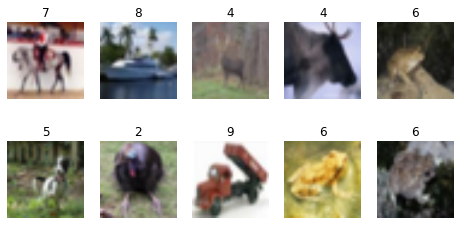

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
for i, (image, label) in enumerate(train_ds.take(10)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(int(np.argmax(label.numpy())))
    plt.axis("off")

In [ ]:
batch_size = 64
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

---

### Exercício 9)

Utilize a mesma base de dados, conforme carregada e pré-processada no exercício anterior.

Você deve agora criar uma camada, logo após a entrada, contendo aumento de dados:
* RandomFlip("horizontal"),
* RandomContrast(0.3),
* RandomRotation(0.2),

Qual foi o intervalo de custo médio no treinamento e validação?

(a) Treinamento=[0.7, 0.9]; Val=[0.55, 0.75]<br>
(b) Treinamento=[0.45, 0.65]; Val=[0.8, 1.0]<br>
(c) Treinamento=[0.1, 0.4]; Val=[0.55, 0.75]<br>
(d) Treinamento=[0.7, 0.9]; Val=[0.8, 1.0]<br>

---

### Exercício 10)

Ainda similar aos exercícios anteriores, agora carregue o modelo pré-treinado, descongele os pesos das últimas 4 camadas da MobileNet e treine por 5 épocas. *Não utilize aumento de dados*. *Não reutilize os modelos anteriores*, recarregue o modelo pré-treinado e refaça o treinamento agora permitindo que as últimas 4 camadas da MobileNet também se adaptem (além da camada de saída que foi inserida como classificadora).

Qual foi o intervalo de custo médio no treinamento e validação?

(a) Treinamento=[0.05, 0.3]; Val=[0.8, 1.0]<br>
(b) Treinamento=[0.4, 0.7]; Val=[0.5, 0.7]<br>
(c) Treinamento=[0.4, 0.7]; Val=[0.8, 1.0]<br>
(d) Treinamento=[0.05, 0.3]; Val=[0.5, 0.7]<br>